In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('C:\\Users\\M RAJESH\\Desktop\\Ekeeda DS\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
dummies = pd.get_dummies(df['Gender'])

In [5]:
df1 = pd.concat([df.drop(['User ID','Gender'],axis=1),dummies.drop('Male',axis=1)],axis=1)

In [6]:
df1.head()

,Age,EstimatedSalary,Purchased,Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


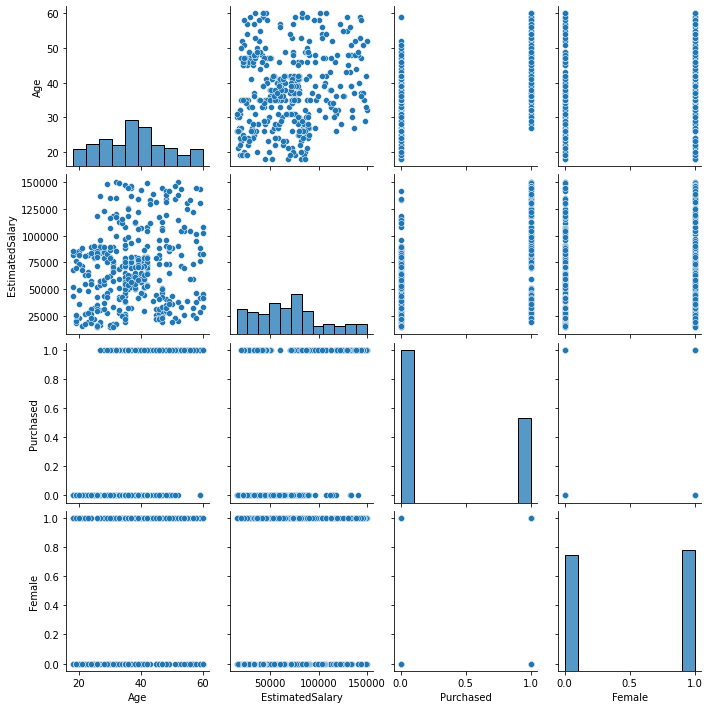

In [7]:
sns.pairplot(df1)

In [8]:
x=df1.drop('Purchased',axis=1)
y=df1.Purchased

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [10]:
len(X_train),len(X_test)

(320, 80)

In [12]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [13]:
X_train

array([[-0.27257222,  0.81711559,  0.97530483],
       [-0.27257222,  1.14463175, -1.02532046],
       [ 0.48837095,  1.26372853,  0.97530483],
       [-1.12863329, -1.11820715, -1.02532046],
       [-1.41398698, -0.64182001,  0.97530483],
       [ 2.10537519, -0.82046519, -1.02532046],
       [-1.69934067,  0.13230908, -1.02532046],
       [-0.17745433, -0.28452966, -1.02532046],
       [-0.27257222,  0.07276069,  0.97530483],
       [-1.69934067,  0.48959944, -1.02532046],
       [-0.17745433, -0.46317484,  0.97530483],
       [ 1.6297857 ,  1.65079308,  0.97530483],
       [-0.08233643,  0.31095426,  0.97530483],
       [-0.08233643, -0.37385225,  0.97530483],
       [-1.88957646, -0.52272323, -1.02532046],
       [ 0.01278147,  0.0429865 , -1.02532046],
       [-0.27257222, -0.58227162, -1.02532046],
       [-0.55792591,  1.41259951,  0.97530483],
       [ 2.01025729,  2.18672861, -1.02532046],
       [ 0.77372464, -1.23730393, -1.02532046],
       [ 0.77372464, -1.38617491, -1.025

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  5]
 [ 6 21]]


0.8625

# with nive bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred_GNB = GNB.predict(X_test)

In [17]:
y_pred_GNB

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [18]:
accuracy_score(y_test,y_pred_GNB)

0.8875

In [20]:
#there is a little high accuracy for naive bayes compared to logistic regression